In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numba import cuda, jit, float32
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import string
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from keras.utils import to_categorical
df = pd.read_csv('C:/Users/11/Desktop/handwritten_data.csv',encoding='utf8')

In [34]:
features = df.values[:,1:]
labels = df.values[:,0]

features = features.reshape(len(features), 28, 28)

nr_to_letter = {k:v.upper() for k,v in enumerate(list(string.ascii_lowercase))}
nr_to_letter

{0: 'A',
 1: 'B',
 2: 'C',
 3: 'D',
 4: 'E',
 5: 'F',
 6: 'G',
 7: 'H',
 8: 'I',
 9: 'J',
 10: 'K',
 11: 'L',
 12: 'M',
 13: 'N',
 14: 'O',
 15: 'P',
 16: 'Q',
 17: 'R',
 18: 'S',
 19: 'T',
 20: 'U',
 21: 'V',
 22: 'W',
 23: 'X',
 24: 'Y',
 25: 'Z'}

필기체 확인

Number of classes: 5
Epoch 1/12
375/375 - 11s - loss: 0.3265 - accuracy: 0.8828 - val_loss: 0.0618 - val_accuracy: 0.9832 - 11s/epoch - 29ms/step
Epoch 2/12
375/375 - 10s - loss: 0.0744 - accuracy: 0.9781 - val_loss: 0.0415 - val_accuracy: 0.9877 - 10s/epoch - 27ms/step
Epoch 3/12
375/375 - 10s - loss: 0.0559 - accuracy: 0.9833 - val_loss: 0.0319 - val_accuracy: 0.9905 - 10s/epoch - 27ms/step
Epoch 4/12
375/375 - 10s - loss: 0.0454 - accuracy: 0.9868 - val_loss: 0.0257 - val_accuracy: 0.9930 - 10s/epoch - 27ms/step
Epoch 5/12
375/375 - 11s - loss: 0.0398 - accuracy: 0.9883 - val_loss: 0.0224 - val_accuracy: 0.9934 - 11s/epoch - 29ms/step
Epoch 6/12
375/375 - 10s - loss: 0.0350 - accuracy: 0.9899 - val_loss: 0.0210 - val_accuracy: 0.9933 - 10s/epoch - 28ms/step
Epoch 7/12
375/375 - 10s - loss: 0.0319 - accuracy: 0.9903 - val_loss: 0.0178 - val_accuracy: 0.9948 - 10s/epoch - 28ms/step
Epoch 8/12
375/375 - 11s - loss: 0.0293 - accuracy: 0.9914 - val_loss: 0.0176 - val_accuracy: 0.9948 - 1

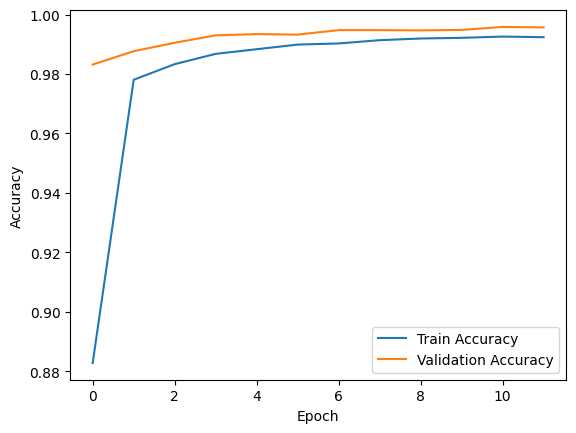

In [35]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/11/Desktop/handwritten_data.csv', encoding='utf8',nrows=60000)

features = df.iloc[:, 1:].values.reshape(-1, 28, 28, 1) 
labels = df.iloc[:, 0].values

num_classes = len(np.unique(labels))
print("Number of classes:", num_classes)

features = features.astype(np.float32) / 255.0

labels_one_hot = tf.keras.utils.to_categorical(labels, num_classes)

x_train, x_test, y_train, y_test = train_test_split(features, labels_one_hot, test_size=0.2, random_state=42)


cnn = Sequential()
cnn.add(Conv2D(8, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(32, activation='relu'))
cnn.add(Dense(num_classes, activation='softmax'))


cnn.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

hist = cnn.fit(x_train, y_train, batch_size=128, epochs=12, validation_data=(x_test, y_test), verbose=2)

res = cnn.evaluate(x_test, y_test, verbose=0)
print("정확률은", res[1] * 100)

plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


1/1 [==============================] - 0s 76ms/step


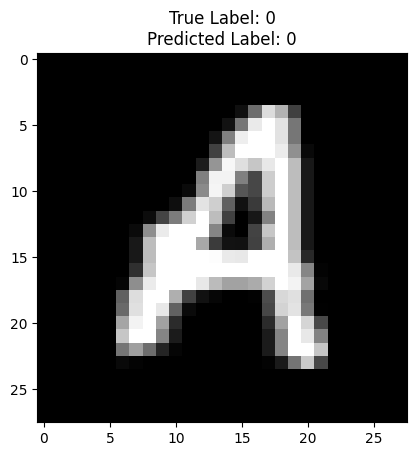

In [36]:
from random import randint
import matplotlib.pyplot as plt

index = randint(0, len(x_test) - 1)
sample_image = x_test[index].reshape(28, 28)

plt.imshow(sample_image, cmap='gray')
plt.title(f"True Label: {np.argmax(y_test[index])}\nPredicted Label: {np.argmax(cnn.predict(x_test[index].reshape(1, 28, 28, 1)))}")
plt.show()

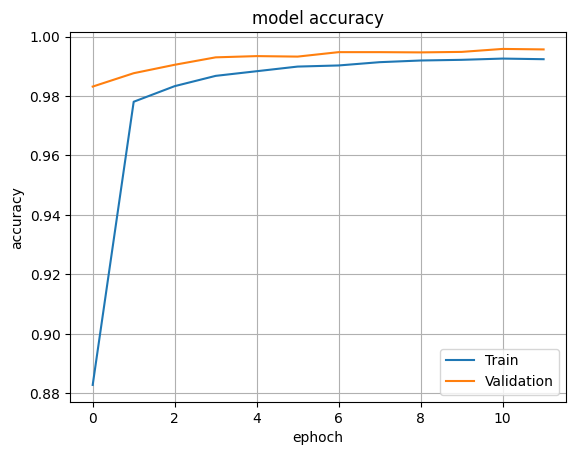

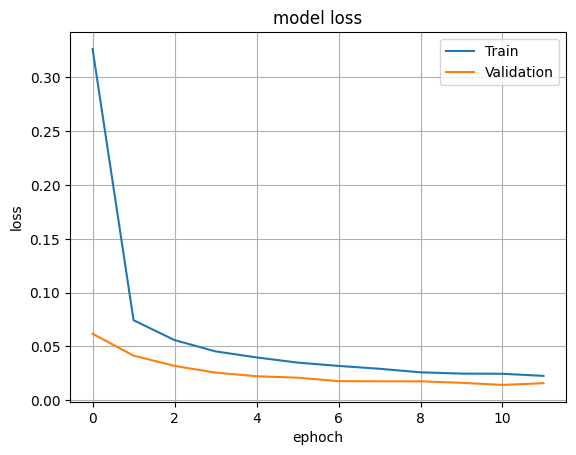

In [37]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel('accuracy')
plt.xlabel('ephoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model loss")
plt.ylabel('loss')
plt.xlabel('ephoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

Epoch 1/12
375/375 - 14s - loss: 0.0204 - accuracy: 0.9939 - val_loss: 0.0125 - val_accuracy: 0.9958 - 14s/epoch - 38ms/step
Epoch 2/12
375/375 - 12s - loss: 0.0206 - accuracy: 0.9934 - val_loss: 0.0179 - val_accuracy: 0.9946 - 12s/epoch - 33ms/step
Epoch 3/12
375/375 - 14s - loss: 0.0186 - accuracy: 0.9940 - val_loss: 0.0128 - val_accuracy: 0.9962 - 14s/epoch - 36ms/step
Epoch 4/12
375/375 - 13s - loss: 0.0162 - accuracy: 0.9949 - val_loss: 0.0129 - val_accuracy: 0.9956 - 13s/epoch - 35ms/step
Epoch 5/12
375/375 - 13s - loss: 0.0172 - accuracy: 0.9949 - val_loss: 0.0153 - val_accuracy: 0.9954 - 13s/epoch - 34ms/step
Epoch 6/12
375/375 - 12s - loss: 0.0168 - accuracy: 0.9946 - val_loss: 0.0127 - val_accuracy: 0.9962 - 12s/epoch - 31ms/step
Epoch 7/12
375/375 - 12s - loss: 0.0154 - accuracy: 0.9953 - val_loss: 0.0144 - val_accuracy: 0.9963 - 12s/epoch - 32ms/step
Epoch 8/12
375/375 - 12s - loss: 0.0160 - accuracy: 0.9947 - val_loss: 0.0092 - val_accuracy: 0.9969 - 12s/epoch - 31ms/step


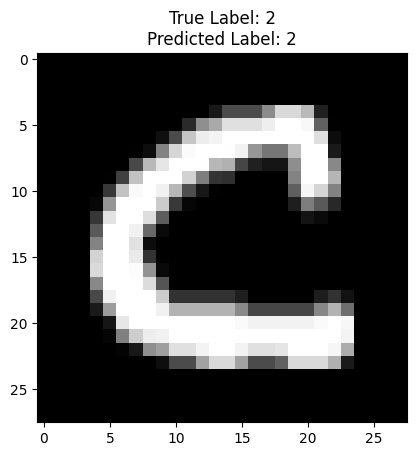

In [38]:
import matplotlib.pyplot as plt
from random import randint

# ... (이전 코드 부분은 그대로 유지)

# Train the model
hist = cnn.fit(x_train, y_train, batch_size=128, epochs=12, validation_data=(x_test, y_test), verbose=2)

# Evaluate the model on the test set
res = cnn.evaluate(x_test, y_test, verbose=0)
print("정확률은", res[1] * 100)

# Choose a random sample from the test set
index = randint(0, len(x_test) - 1)
sample_image = x_test[index].reshape(28, 28)

# Display the sample image
plt.imshow(sample_image, cmap='gray')
plt.title(f"True Label: {np.argmax(y_test[index])}\nPredicted Label: {np.argmax(cnn.predict(x_test[index].reshape(1, 28, 28, 1)))}")
plt.show()